In [1]:
# Cell 1: Clone repo and set working directory
!git clone https://github.com/MementoMori15x6/15x6-sim.git
%cd 15x6-sim
!pwd  # Should show /content/15x6-sim
!ls data/  # Should list your CSVs (including 35_metrics_north_korea_1980_2025.csv)

Cloning into '15x6-sim'...
remote: Enumerating objects: 833, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 833 (delta 93), reused 0 (delta 0), pack-reused 667 (from 2)
Receiving objects: 100% (833/833), 2.41 MiB | 7.40 MiB/s, done.
Resolving deltas: 100% (479/479), done.
/content/15x6-sim
/content/15x6-sim
 35_metrics_ant_colony_baseline.csv
 35_metrics_ant_colony_baseline_old.csv
 35_metrics_north_korea_1980_2025.csv
 35_metrics_placeholders.csv
 35_metrics_venice_republic_697–1797.csv
'RC1_placeholder_35-metric_CSV_(USAPRC_calibration).md'


In [2]:
# Cell 2: Imports & config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# Early padding for y-labels
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True

print("Imports complete.")

Imports complete.


In [4]:
# Cell 3: Canonical 15 rules & 6 moves
rules = [
    "1. Harvest negative entropy",
    "2. Replicate with heredity",
    "3. Allow heritable variation",
    "4. Differential persistence",
    "5. Individual survival until replication",
    "6. Resource acquisition & defense",
    "7. Reproductive success",
    "8. Adaptation to change",
    "9. Diversity maintenance",
    "10. Niche construction & colonization",
    "11. Boundary maintenance",
    "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY RULE)",
    "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]

moves = [
    "Mutualism (+/+)",
    "Commensalism (+/0)",
    "Parasitism (+/–)",
    "Competition (–/–)",
    "Amensalism (0/–)",
    "Neutralism (0/0)"
]

In [5]:
# Cell 4: RC1 Diagnostic Function
def rc1_diagnostic(target, csv_path):
    df = pd.read_csv(csv_path)
    if "Score" not in df.columns:
        print(f"Error: 'Score' column not found in {csv_path}")
        return None, None, None

    scores = df["Score"].astype(float).values
    metabolic = scores[0:18]
    governance = scores[18:35]

    rule13_rel_indices = np.array([0,1,2,3,4,5,8])
    rule13_values = governance[rule13_rel_indices]

    Y_raw_base = np.mean(governance)
    negative_rule13 = rule13_values[rule13_values < 0]
    friction_drag = np.mean(negative_rule13) if len(negative_rule13) > 0 else 0.0

    friction_threshold = -5.0
    veto_multiplier = 1.5 if friction_drag < friction_threshold else 0.8

    Y_raw = Y_raw_base - veto_multiplier * abs(friction_drag)
    A = 1.5
    Y_projected = Y_raw * A
    Y_clipped = np.clip(Y_projected, -1.0, 1.0)

    X = np.clip(np.mean(metabolic) / 10.0, -1.0, 1.0)

    rule13_norm = rule13_values / 10.0
    negative_mask = rule13_norm < 0
    parasitism_weighted = np.sum(-rule13_norm[negative_mask]) / len(rule13_norm) if len(rule13_norm) > 0 else 0
    parasitism_pct = parasitism_weighted * 100

    if Y_clipped >= 0.8:
        zone = "Prime Mutualism (Saturated Success)"
        longevity = "Centuries (high-trust baseline)"
    elif 0.3 <= Y_clipped < 0.8:
        zone = "Stressed Mutualism"
        longevity = "Decades (drift zone)"
    elif -0.29 < Y_clipped < 0.3:
        zone = "Separatrix"
        longevity = "Years (critical instability)"
    elif -0.99 <= Y_clipped < -0.29:
        zone = "Active Competition"
        longevity = "Terminal (slow collapse)"
    else:
        zone = "Boundary Saturation"
        longevity = "Imminent (kill switch active)"

    result = {
        "Target": target,
        "X": round(X, 3),
        "Y_clipped": round(Y_clipped, 3),
        "Parasitism %": round(parasitism_pct, 1),
        "Zone": zone,
        "Longevity Window": longevity
    }

    print(f"--- RC1 Diagnostic: {target} ---")
    for k, v in result.items():
        print(f"{k}: {v}")
    print("")

    return Y_clipped, parasitism_pct, X

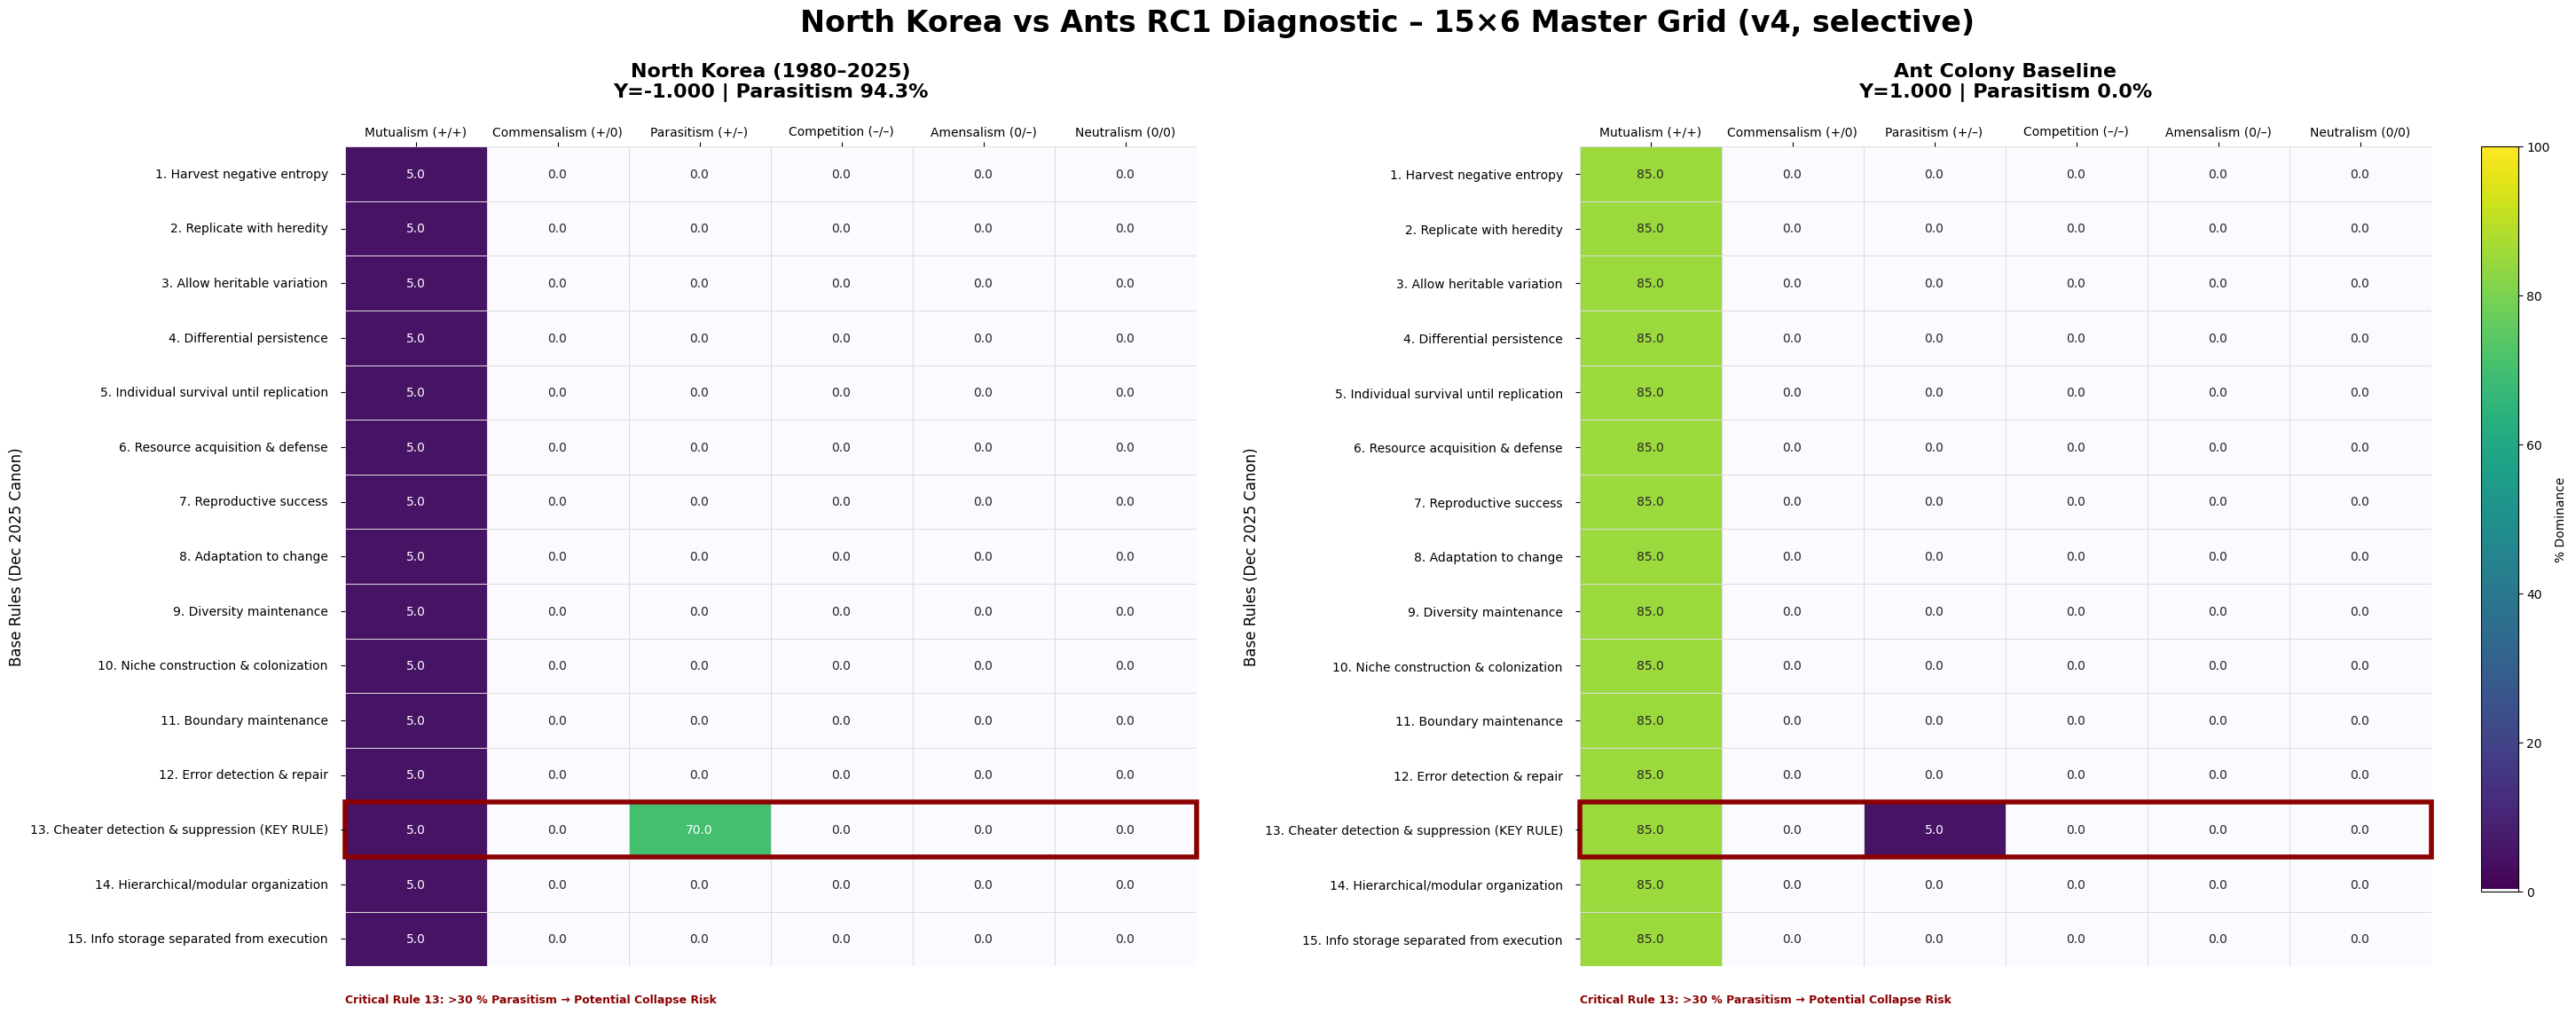

Saved: nk_vs_ants_rc1_diagnostic_v3.png


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# Early padding for y-labels
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True

# Canonical labels
rules = [
    "1. Harvest negative entropy",
    "2. Replicate with heredity",
    "3. Allow heritable variation",
    "4. Differential persistence",
    "5. Individual survival until replication",
    "6. Resource acquisition & defense",
    "7. Reproductive success",
    "8. Adaptation to change",
    "9. Diversity maintenance",
    "10. Niche construction & colonization",
    "11. Boundary maintenance",
    "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY RULE)",
    "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]

moves = [
    "Mutualism (+/+)",
    "Commensalism (+/0)",
    "Parasitism (+/–)",
    "Competition (–/–)",
    "Amensalism (0/–)",
    "Neutralism (0/0)"
]

# Placeholder matrices (replace with your real 15×6 % dominance values)
nk_matrix = np.zeros((15, 6))
nk_matrix[:, 0] = 5.0   # Low mutualism
nk_matrix[12, 2] = 70.0  # High parasitism in Rule 13

ants_matrix = np.zeros((15, 6))
ants_matrix[:, 0] = 85.0  # High mutualism
ants_matrix[12, 2] = 5.0   # Low parasitism

nk_df = pd.DataFrame(nk_matrix, index=rules, columns=moves)
ants_df = pd.DataFrame(ants_matrix, index=rules, columns=moves)

# Styling — EXACTLY matches blank v4 (light blue tint at zero)
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
newcolors[0, :] = [0.98, 0.98, 1, 1]  # Light blue-white tint at zero
custom_map = LinearSegmentedColormap.from_list('FullSaturation', newcolors)
oxford_red = "#8B0000"

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12), sharey=True)
cbar_ax = fig.add_axes([0.94, 0.15, 0.015, 0.7])

fig.suptitle("North Korea vs Ants RC1 Diagnostic – 15×6 Master Grid (v4, selective)", fontsize=24, fontweight='bold', y=0.98)

for ax, df, title, y_val, parasitism in zip([ax1, ax2], [nk_df, ants_df],
                                           ["North Korea (1980–2025)", "Ant Colony Baseline"],
                                           [nk_y, ants_y],
                                           [nk_parasitism, ants_parasitism]):
    sns.heatmap(df, annot=True, fmt=".1f", cmap=custom_map, vmin=0, vmax=100,
                linewidths=0.5, linecolor="#dddddd", cbar=False, ax=ax)

    ax.set_title(f"{title}\nY={y_val:.3f} | Parasitism {parasitism:.1f}%",
                 fontsize=16, pad=40, fontweight='bold')
    ax.set_ylabel("Base Rules (Dec 2025 Canon)", fontsize=12)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=45, ha="left", fontsize=10)
    ax.set_yticklabels(rules, rotation=0, fontsize=10, visible=True)
    ax.tick_params(axis='y', which='major', pad=10, labelleft=True, labelright=False)

    ax.add_patch(plt.Rectangle((0, 12), 6, 1, fill=False, edgecolor=oxford_red, lw=4, clip_on=False))

    ax.text(0, 15.5, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
            fontsize=9, color=oxford_red, ha='left', va='top', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Shared colorbar with gradient
fig.colorbar(ax1.collections[0], cax=cbar_ax, label='% Dominance')

plt.subplots_adjust(wspace=0.45, left=0.08, right=0.92, top=0.85, bottom=0.08)
plt.savefig("nk_vs_ants_rc1_diagnostic_v3.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: nk_vs_ants_rc1_diagnostic_v3.png")